Code interrupted: Max distance
Code interrupted: Max distance


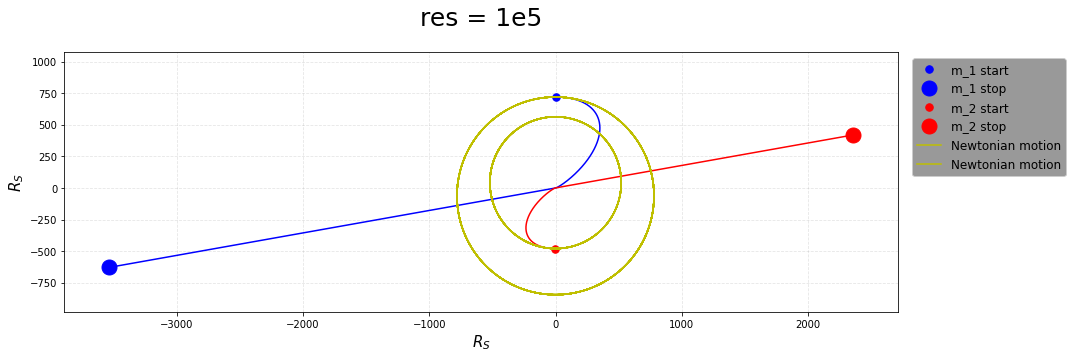

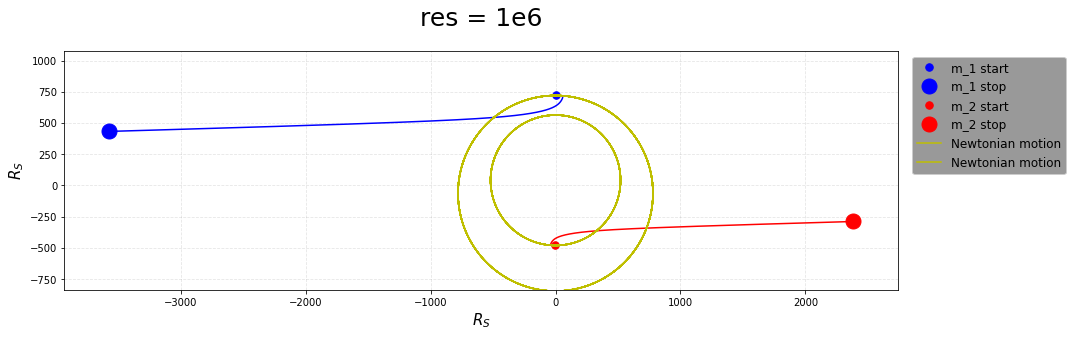

In [14]:
%run ./Functions_PM_new.ipynb

c = const.c.value
G = const.G.value
M_sun = const.M_sun.value
M_earth = const.M_earth.value

x_1 = np.array([0., 1000.])
x_2 = np.array([0., -200.])
v_1 = np.array([0.005, 0.])
v_2 = np.array([-0.01, 0.])
m_1 = 10e-2
m_2 = 15e-2

s = x_1, x_2, v_1, v_2, m_1, m_2

t_max = 1e7/2
res = 1e5
dt = t_max/res


positionsN = run_modelN(s, t_max=t_max, dt=dt, DL=True)

M = slice(0, -1, 1)
# lim = 1e-2
# lims = (-lim, lim)
lims = 0
positions1, momenta1 = run_model(s, t_max=t_max, dt=dt, DL=True, return_momenta=True, α=1)
orbPlotter(positions1, positionsN, slice = M, xlim=lims, ylim=lims, DL = True, filename='res = 1e5', figsize=(15, 5))

t_max = 1e7/2
res = 1e6
dt = t_max/res
positions2, momenta2 = run_model(s, t_max=t_max, dt=dt, DL=True, return_momenta=True, α=1)
orbPlotter(positions2, positionsN, slice = M, xlim=lims, ylim=lims, DL = True, filename='res = 1e6', figsize=(15, 5))

Code interrupted: Max distance


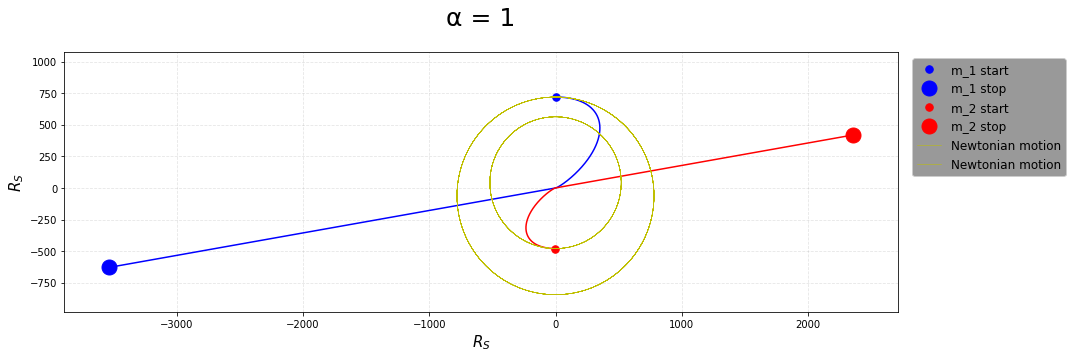

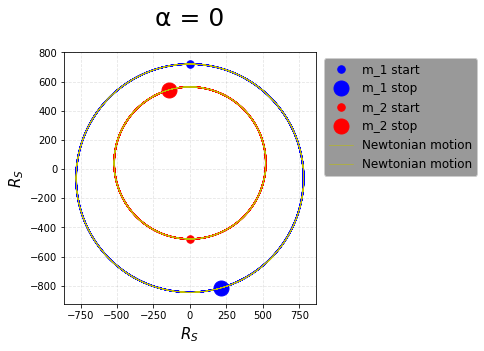

In [41]:
%run ./Functions_PM_new.ipynb

c = const.c.value
G = const.G.value
M_sun = const.M_sun.value
M_earth = const.M_earth.value

x_1 = np.array([0., 1000.])
x_2 = np.array([0., -200.])
v_1 = np.array([0.005, 0.])
v_2 = np.array([-0.01, 0.])
a_1 = np.array([0.,    0.])
a_2 = np.array([0.,    0.])
m_1 = 10e-2
m_2 = 15e-2

P_1 = four_P(three_p(v_1, m_1, DL=True), m_1, DL=True) 
P_2 = four_P(three_p(v_2, m_2, DL=True), m_2, DL=True) 

R_S = findR_S(P_1, P_2, DL=True)

s = x_1, x_2, v_1, v_2, m_1, m_2

t_max = 1e7/2
res = 1e5
dt = t_max/res


positionsN = run_modelN(s, t_max=t_max, dt=dt, DL=True)
positions1, momenta1 = run_model(s, t_max=t_max, dt=dt, DL=True, return_momenta=True, α=1)
positions2, momenta2 = run_model(s, t_max=t_max, dt=dt, DL=True, return_momenta=True, α=0)
# positions3, momenta3 = run_model(s, t_max=t_max, dt=dt, DL=True, return_momenta=True, α=0.001)

Positions = [positions1, positions2]
Momenta = [momenta1, momenta2]

M = slice(0, -1, 1)
# orbPlotter(positions, positionsN, slice = M)

# lim = 1e-2
# lims = (-lim, lim)
lims = 0
orbPlotter(positions1, positionsN, slice = M, xlim=lims, ylim=lims, DL = True, filename='α = 1', figsize = (15,5))
orbPlotter(positions2, positionsN, slice = M, xlim=lims, ylim=lims, DL = True, filename='α = 0', figsize = (15,5))
# orbPlotter(positions3, positionsN, slice = M, xlim=lims, ylim=lims, DL = True, filename='α = 0.001')

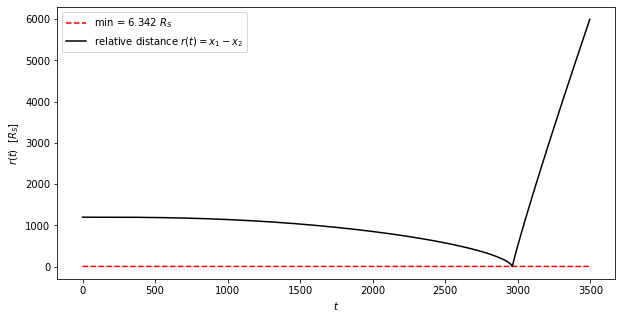

In [39]:
import scipy.signal as scipy
rs = []
for i in range(len(positions1[0,0])):
    rs.append(rel_len(positions1[0,:,i], positions1[1,:,i]))
rs = np.array(rs)
minIndex = scipy.argrelmin(data=rs)

t = np.arange(0, len(positions1[0,0]), 1)
line = np.ones_like(t)*rs[minIndex[0][-1]]

fig, ax = plt.subplots(figsize=(10,5))
ax.ticklabel_format(useOffset=False)
ax.plot(t, line, 'r--', label=f'min = {rs[minIndex[0][-1]]:.3f} $R_S$')
ax.plot(t,rs, 'k-', lw=1.5, label='relative distance $r(t) = x_1 - x_2$')
ax.set_xlabel('$t$')
ax.set_ylabel('$r(t)$  $[R_S]$')
ax.legend()



# ax.plot(minIndex[0][-1], rs[minIndex[0][-1]], 'rx', markersize = 10)


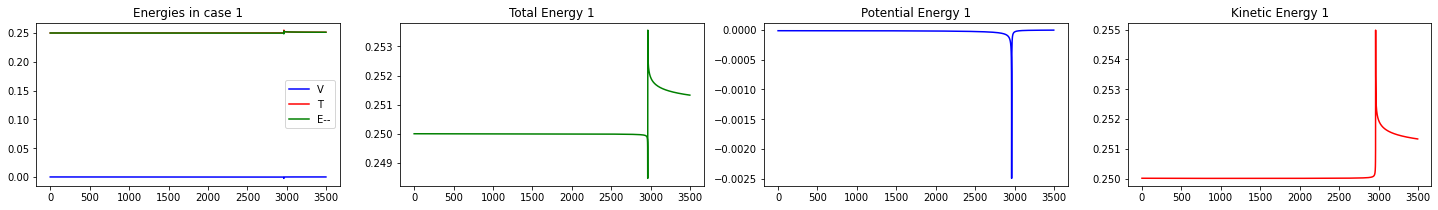

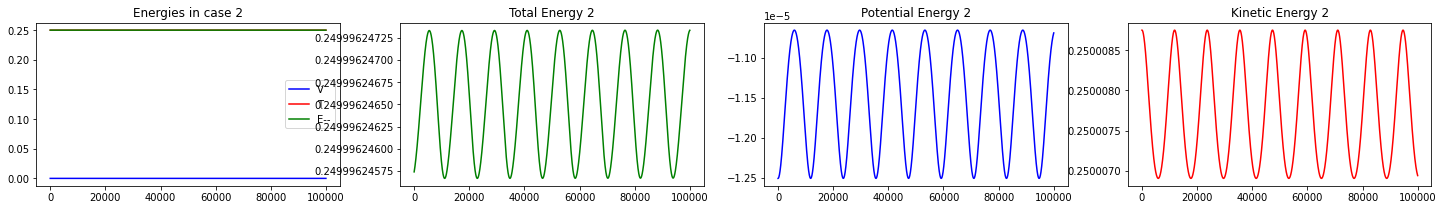

In [47]:
def V_1PM(x_1, x_2, P_1, P_2, m_1, m_2, DL):
    if DL == True:
        G, c = 1, 1
    else:
        c = const.c.value
        G = const.G.value
    r = rel_len(x_1, x_2)
    return G/r*((m_1*m_2)**2*c**4  - 2*fourdot(P_1, P_2)**2)/(P_1[0]*P_2[0])

for j in range(len(Momenta)):
    t = range(int(len(Momenta[j][0][0])))
    S = slice(0, int(len(Momenta[j][0][0])))
    # S = slice(0, -1)

    potential = []
    for i in range(len(Momenta[j][0][0])):
        x_1 = Positions[j][0][:,i]
        x_2 = Positions[j][1][:,i]
        P_1 = Momenta[j][0][:,i]
        P_2 = Momenta[j][1][:,i]
        potential.append(V_1PM(x_1, x_2, P_1, P_2, m_1, m_2, DL = True))


    fig, axs = plt.subplots(1,4, figsize=(25,3))
    ax1, ax2, ax3, ax4 = axs[0], axs[1], axs[2], axs[3]

    

    ax1.ticklabel_format(useOffset=False)
    ax1.plot(t[S], potential[S], 'b', label='V')
    ax1.plot(t[S], Momenta[j][0][0][S]+Momenta[j][1][0][S], 'r', label='T')
    ax1.plot(t[S], Momenta[j][0][0][S]+Momenta[j][1][0][S]+potential[S], 'g--', label='E')
    ax1.title.set_text(f'Energies in case {j+1}')
    ax1.legend()
    # if j == 0:
    #     ax1.plot(900, 0.24994, 'rx')

    ax2.ticklabel_format(useOffset=False)
    ax2.plot(t[S], Momenta[j][0][0][S]+Momenta[j][1][0][S]+potential[S], 'g', label='E')
    ax2.title.set_text(f'Total Energy {j+1}')

    ax3.ticklabel_format(useOffset=False)
    ax3.plot(t[S], potential[S], 'b', label='V')
    ax3.title.set_text(f'Potential Energy {j+1}')

    ax4.ticklabel_format(useOffset=False)
    ax4.plot(t[S], Momenta[j][0][0][S]+Momenta[j][1][0][S], 'r', label='T')
    ax4.title.set_text(f'Kinetic Energy {j+1}')



array([-0.00150008, -0.00150007, -0.00150006, ..., -0.00132431,
       -0.00132506, -0.00132581])